In [5]:
#Ivan Thich and Jenny Chrin

In [6]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model #Temp 
from sklearn.metrics import r2_score #Temp
from math import exp
%matplotlib inline

In [7]:
data = pd.read_csv('Admission_Predict_Ver1.2.csv')
data.head()
# -------------Legends For Data-------------
# GRE - GRE General Test
# TOEF - TOEL iBT Test
# SOP - Statement of Purpose
# LOR - Letter of Recommendation
# CGPA - Cumulative Grade Point Average
# Research - Research Project(?)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
#Methods Being Used Area
def TOEFL_least_squares_line(input):
    m = TOEFL_least_squares[0]
    b = TOEFL_least_squares[1]
    return b + m*input

def CGPA_least_squares_line(input):
    m = CGPA_least_squares[0]
    b = CGPA_least_squares[1]
    return b + m*input

def GRE_least_squares_line(input):
    m = GRE_least_squares[0]
    b = GRE_least_squares[1]
    return b + m*input

def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

def normalize(X):
    return X - X.mean()

def logistic_regression(X, Y):

    X = normalize(X)
    
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

0.8824125749045747

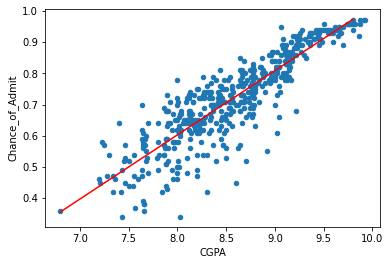

In [9]:
CGPA_least_squares = np.polyfit(data.CGPA, data.Chance_of_Admit, 1)
CGPA_points = np.arange(data.CGPA.min(), data.CGPA.max())
#Relationship between CGPA and Chances of Admission
data.plot(kind='scatter', x= 'CGPA', y= 'Chance_of_Admit')
plt.plot(CGPA_points, CGPA_least_squares_line(CGPA_points), 'r')
#Highly correlated, the higher your CGPA is, the chance of getting in increases.
#Finding the correlation coefficient
np.corrcoef(data.Chance_of_Admit, data.CGPA)[1,0]

In [ ]:
GRE_least_squares = np.polyfit(data.GRE_Score, data.CGPA, 1)
GRE_points = np.arange(data.GRE_Score.min(), data.GRE_Score.max())
#Relationship between GRE Score and CGPA
data.plot(kind='scatter', x='GRE_Score', y='CGPA')
plt.plot(GRE_points, GRE_least_squares_line(GRE_points), 'r')
#The higher the CGPA an individual has, the higher their GRE score will be.
#Finding the correlation coefficient
np.corrcoef(data.CGPA, data.GRE_Score)[1,0]

0.792227614305083

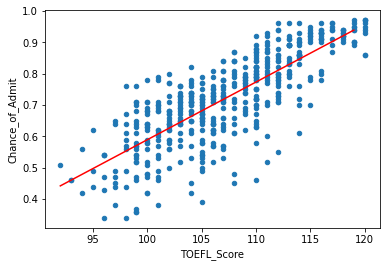

In [12]:
TOEFL_least_squares = np.polyfit(data.TOEFL_Score, data.Chance_of_Admit, 1)
TOEFL_points = np.arange(data.TOEFL_Score.min(), data.TOEFL_Score.max())
#Relationship between TOEFL Scores and Chances of Admission
data.plot(kind='scatter', x='TOEFL_Score', y='Chance_of_Admit')
plt.plot(TOEFL_points, TOEFL_least_squares_line(TOEFL_points), 'r')
#TOEFL and Chances of Admission seem to be highly correlated as the plots seem to be dense, it makes sense as the higher the score rating, the greater chances you will be admitted into a university.

#Finding the correlation coefficient
np.corrcoef(data.Chance_of_Admit, data.TOEFL_Score)[1,0]

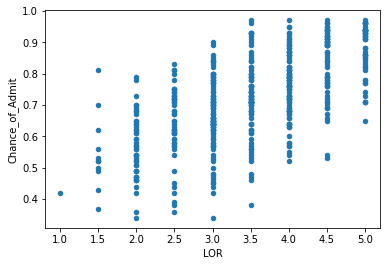

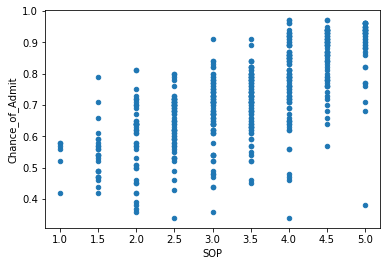

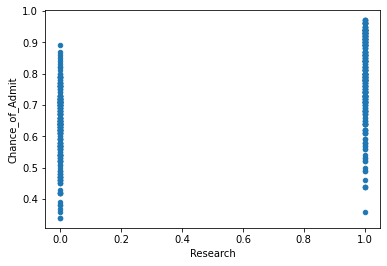

In [13]:
# Which features do you expect will not be well represented by a linear fit?
#  LOR won't be well represented by a linear fit because of the y-values being sporadic: (8,4) (9, 1.5) (10, 3)
data.plot(kind='scatter', x='LOR', y='Chance_of_Admit')
# We can see that the y-value 4 suddenly decreases to 1.5, then increases up to 3.
# Same Research and SOP
data.plot(kind='scatter', x='SOP', y='Chance_of_Admit')
data.plot(kind='scatter', x='Research', y='Chance_of_Admit')

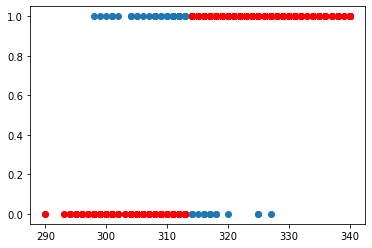

In [63]:
#Make a prediction for the chance of someone to be admitted to graduate school assuming that they have a GRE score of 315. You should use what you have learned in class to do so.
# After collecting all chances of admissions from participants who had a GRE score of 315, I sorted all the    percentages, added them togther, divided them to find the average. The average chance of getting in for students who scored 315 in the GRE Test is around 65%.

#Predicting
data['Accept'] = data['Chance_of_Admit'] #Creates a new column identical to 'Chance_of_Admit'
data['Accept'] = np.where(data['Accept'] >= 0.65, 1, 0) #If value in 'Accept' column is above 0.65, which is the average acceptance rate for participants who have the score of 315, replace w/ 1, otherwise replace w/0

train_data_GRE, test_data_GRE, train_data_ChanceOfAdmit, test_data_ChanceOfAdmit = train_test_split(data['GRE_Score'], data['Accept'], test_size = 0.60) # SUGGEST: Find a way to reduce redundancy on the amount of variables created in this statement

b0, b1 = logistic_regression(train_data_GRE, train_data_ChanceOfAdmit)

GRE_norm = normalize(test_data_GRE)
COA_pred = predict(GRE_norm, b0, b1)

test_pred_binary = [1 if p >= 0.65 else 0 for p in COA_pred] # If you comment this off and replace with COA_pred instead, will turn to a bell curve

#X is GRE_Score and Y is Chance_of_Admit
plt.figure()
plt.scatter(test_data_GRE, test_data_ChanceOfAdmit)
plt.scatter(test_data_GRE, test_pred_binary, c = 'red')

In [15]:
#Make a prediction for the chance of someone to be admitted to graduate school assuming that they (1) have a TOEFL score of 109 and (2) a GRE score of 325
#Since there isn't a student that has met the requirements in the question, it will be based on TOEFL scores that are greater than 109. Average chance of students who have a TOEFL score greater than 109 and GRE score of 325 is around 75%

#Setting up the data
multivar = data[['GRE_Score', 'TOEFL_Score', 'Chance_of_Admit']]
multivar.head()

,GRE_Score,TOEFL_Score,Chance_of_Admit
0,337,118,0.92
1,324,107,0.76
2,316,104,0.72
3,322,110,0.80
4,314,103,0.65


In [62]:
#Splitting up into training/testing
data_set = multivar[0:int(len(multivar))] #All of the data starting from first row to last

x = np.array(data_set[['GRE_Score','TOEFL_Score']])
y = data_set['Chance_of_Admit']

#Training the data
ols = linear_model.LinearRegression()
model = ols.fit(x, y)

model.predict([[325, 109]]) #Predicts the chance of admission for students who have a GRE score of 325 and TOEFL score of 109

array([0.79025927])

In [17]:
#Miscellaneous Stuff
print(model.coef_)
print(model.intercept_)

[0.00539142 0.00974147]
-2.0301355337991045


In [18]:
data.Chance_of_Admit.mean()

0.72174